In [2]:
import torch 
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import PIL

In [27]:
def perturb(x: torch.Tensor, size: torch.Tensor, perportion = 0.5):
    """
    x: shape B*C*H*W image to perturb
    size: B*2 tensor of height and weight of the true image
    perportion: how many 
    
    This function perform masking/perturbing on the original images, used for pretraining, current method is rotation
    
    return:
    'torch.Tensor' with the same shape as input x
    """
    

    area = size[:,0]*size[:,1]
    B = area.shape[0]
    N = torch.randint(low = 8, high = 13,size = (1,))
    b = 15
    lower =  torch.floor((-3*b + np.sqrt(9*b**2-12*(b**2-3*perportion/N*area)))/b)
    # print(lower.shape)
    print(lower)
    
    start_position = torch.rand(size = (B,N,2))
    start_position[:,:,0] *= (size[:,0].unsqueeze(1)-10)
    start_position[:,:,1] *= (size[:,1].unsqueeze(1)-10)
    start_position = torch.floor(start_position)
    
    
    length = torch.rand(size = (B,N))
    angles = torch.randint_like(length, high = 3)
    length = torch.round(lower[...,None] + length*b)
    # angle_list = torch.Tensor([90,180,270]).float()

    
    for i in range(B):
        for j in range(N):
            int_st1 = int(start_position[i,j,0])
            int_st2 = int(start_position[i,j,1])
            this_len = int(torch.round(length[i,j]))
            this_len = int(np.min([this_len, size[i,0]-int_st1,size[i,1]-int_st2]))
            patch = x[i,:,int_st1:(int_st1 + this_len),int_st2:(int_st2 + this_len)]
            # print(patch.shape)
            rotated = torch.rot90(patch, k = int(angles[i,j]), dims = [1,2])
            x[i,:,int_st1:(int_st1 + this_len),int_st2:(int_st2 + this_len)] = rotated
    
    

    return x
    
    

In [4]:
perturb(torch.randn(size = (7,3,200,300)), size = torch.randint(low = 100, high = 200, size = (7,2))).shape

tensor([17., 16., 10., 17., 17., 12., 12.])


torch.Size([7, 3, 200, 300])

In [34]:
image_list = []
for i in range(3):
    img = np.asarray(PIL.Image.open("./000"+str(i+1)+".jpg"))
    image_list.append(img.transpose((2,0,1))[None,...])
img_batch = torch.Tensor(np.concatenate(image_list, axis = 0)).float()
    

image_list

In [7]:
print(img_batch.shape)
size = torch.Tensor([[500.,500.],[3072/3,1024],[3072/3,100]])

torch.Size([3, 3, 1024, 1024])


In [37]:
perturbed = perturb(img_batch, size = size )

tensor([41., 88., 25.])


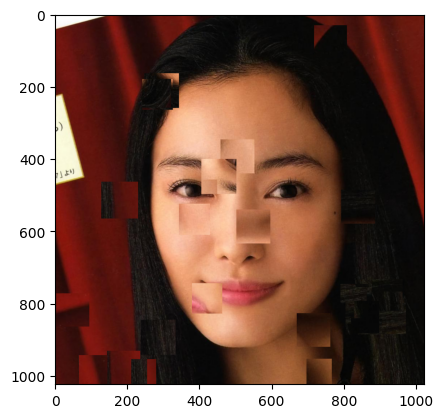

In [38]:

plt.imshow(perturbed[1].permute(1,2,0).numpy().astype('int'))

In [ ]:
H = 200
W = 400
N = 10
b = 10
portion = 0.3

(-3*b + np.sqrt(9*b**2-12*(b**2-3*portion/N*H*W)))/b


26.342801502242416